In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import qmc 
import functionBank as func
import os
import optimiserBank as opt
import imageio
from PIL import Image
import scienceplots
plt.style.available
plt.style.use(['science', 'notebook'])
from sklearn.preprocessing import MinMaxScaler
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.indicators.igd import IGD
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
from itertools import product
import functionBank

10 DE Iterations, IGD = 0.04926853687626517
25 DE Iterations, IGD = 0.06236680377200687
50 DE Iterations, IGD = 0.06429365807686041
75 DE Iterations, IGD = 0.05780212752182041
100 DE Iterations, IGD = 0.06315543756839528
200 DE Iterations, IGD = 0.06259065272967215
500 DE Iterations, IGD = 0.07059555568144206
10 DE Iterations, IGD = 0.041305681368213776
25 DE Iterations, IGD = 0.06321526648957984
50 DE Iterations, IGD = 0.0661054336550466
75 DE Iterations, IGD = 0.057174047860126836
100 DE Iterations, IGD = 0.061359048994902986
200 DE Iterations, IGD = 0.06720741970470352
500 DE Iterations, IGD = 0.05831737463295408
10 DE Iterations, IGD = 0.039846894174015095
25 DE Iterations, IGD = 0.06197917068902033
50 DE Iterations, IGD = 0.06213420341952678
75 DE Iterations, IGD = 0.07865325339350915
100 DE Iterations, IGD = 0.07622449599732285
200 DE Iterations, IGD = 0.06847205749430128
500 DE Iterations, IGD = 0.05022396406068006
10 DE Iterations, IGD = 0.0653200864475477
25 DE Iterations, IGD

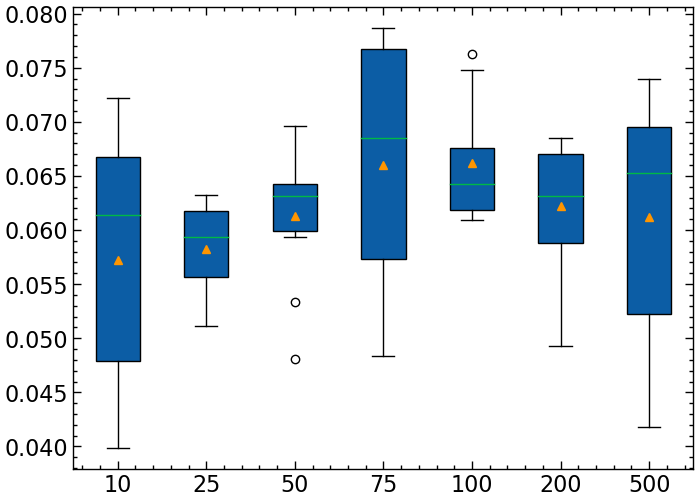

In [17]:
deIters = ['10', '25', '50', '75', '100', '200', '500']
# IGDData = []
n_obj = 2
n_var = 6

problem, bounds = functionBank.getPyMooProblem('dtlz2', n_var, n_obj)
ref_dirs = get_reference_directions("das-dennis", n_obj, n_partitions=10)
dtlz2Pareto = get_problem('dtlz2').pareto_front(ref_dirs)
ind = IGD(dtlz2Pareto)

files = glob.glob('/Users/benmoore/projects/elgarMOOOpt/deIterTest3/*')
iterData = np.empty((0,7))
iterDict = {}

for i in range(1,11): 
    IGDData = []
    files = glob.glob(f'/Users/benmoore/projects/elgarMOOOpt/dtlz2objRun1To10/DEdtlz2Run2Obj{i}/*')

    for iterNum in deIters:
        

        for file in files:
            if f'BOObjtvTargetsdtlz2{iterNum}Iter.txt' not in file:
                continue
            ot = np.loadtxt(file)
            print(f'{iterNum} DE Iterations, IGD =', ind(ot))
            IGDData.append(ind(ot))
            otPareto = func.computeParetoShells(ot)[0]
            # plt.scatter(ot[:,0], ot[:,1])
            # plt.scatter(otPareto[:,0], otPareto[:,1])
            # plt.title(f'DTLZ2, {iterNum} DE Iterations')
            # plt.show()
    IGDData = np.array(IGDData)
    # print(IGDData)
    # print(iterData.shape, IGDData.shape)
    iterData = np.vstack((iterData, IGDData))
    # print(iterData)    
meanData = np.mean(iterData, axis=0)
print(meanData)
# for i in range(10):
#     plt.scatter(deIters, iterData[i], alpha=0.5)
plt.boxplot(iterData, labels=deIters, showmeans=True, patch_artist=True)
plt.show()
